Initial setup

In [69]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import os
datapath = os.path.join("datasets", "")


Download dataset

In [70]:
import urllib.request
DOWNLOAD_PATH = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv"
os.makedirs(datapath, exist_ok=True)
url = DOWNLOAD_PATH
urllib.request.urlretrieve(url, datapath + "oecd_bli_2015.csv")

('datasets/oecd_bli_2015.csv', <http.client.HTTPMessage at 0x783dd3e46920>)

Prepare data and visualize it

Indicator        Years in education  Homicide rate
Country                                           
Australia                      19.4            0.8
Austria                        17.0            0.4
Belgium                        18.9            1.1
Brazil                         16.3           25.5
Canada                         17.2            1.5
Chile                          16.5            4.4
Czech Republic                 18.1            0.8
Denmark                        19.4            0.3
Estonia                        17.5            4.8
Finland                        19.7            1.4
France                         16.4            0.6
Germany                        18.2            0.5
Greece                         18.6            1.6
Hungary                        17.6            1.3
Iceland                        19.8            0.3
Ireland                        17.6            0.8
Israel                         15.8            2.3
Italy                          

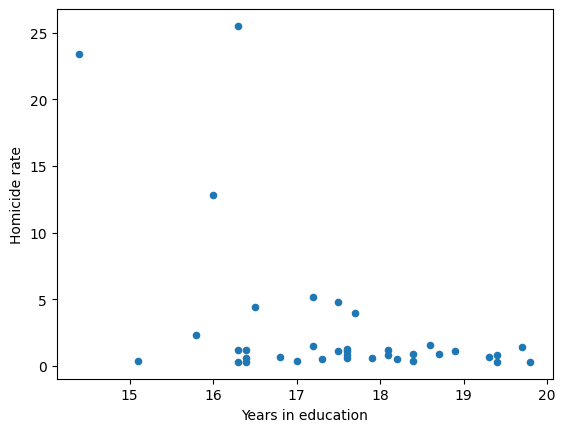

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
country_stats = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
country_stats = country_stats[country_stats["INEQUALITY"]=="TOT"]
country_stats = country_stats.pivot(index="Country", columns="Indicator", values="Value")
print(country_stats[["Years in education", "Homicide rate"]])
X = np.c_[country_stats["Years in education"]]
y = np.c_[country_stats["Homicide rate"]]
country_stats.plot(kind='scatter', x="Years in education", y='Homicide rate')
plt.show()

Remove outliers and see new data

Indicator        Years in education  Homicide rate
Country                                           
Australia                      19.4            0.8
Austria                        17.0            0.4
Belgium                        18.9            1.1
Canada                         17.2            1.5
Czech Republic                 18.1            0.8
Denmark                        19.4            0.3
Finland                        19.7            1.4
France                         16.4            0.6
Germany                        18.2            0.5
Greece                         18.6            1.6
Hungary                        17.6            1.3
Iceland                        19.8            0.3
Ireland                        17.6            0.8
Italy                          16.8            0.7
Japan                          16.3            0.3
Korea                          17.5            1.1
Luxembourg                     15.1            0.4
Netherlands                    

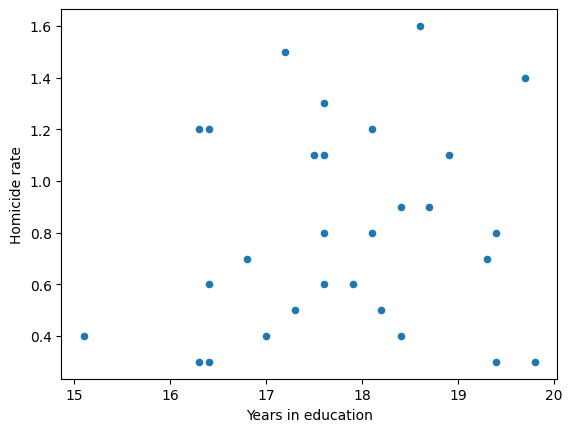

In [72]:
remove_indices = [3, 5, 8, 16, 21, 25, 28]
keep_indices = list(set(range(36)) - set(remove_indices))
country_stats = country_stats[["Years in education", 'Homicide rate']].iloc[keep_indices]
print(country_stats[["Years in education", "Homicide rate"]])
X = np.c_[country_stats["Years in education"]]
y = np.c_[country_stats["Homicide rate"]]
country_stats.plot(kind='scatter', x="Years in education", y='Homicide rate')
plt.show()

Split data in training data and test data

Indicator        Years in education  Homicide rate
Country                                           
Iceland                        19.8            0.3
Spain                          17.6            0.6
Czech Republic                 18.1            0.8
Netherlands                    18.7            0.9
Greece                         18.6            1.6
Luxembourg                     15.1            0.4
United Kingdom                 16.4            0.3
Australia                      19.4            0.8
Korea                          17.5            1.1
France                         16.4            0.6
Ireland                        17.6            0.8
Slovak Republic                16.3            1.2
Austria                        17.0            0.4
Denmark                        19.4            0.3
Turkey                         16.4            1.2
Switzerland                    17.3            0.5
Hungary                        17.6            1.3
Poland                         

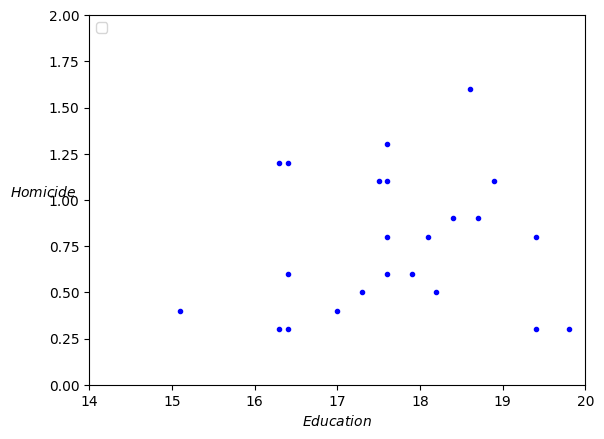

In [73]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=19)
X_test, y_test = None, None
for train_idx, test_idx in split.split(country_stats, country_stats["Homicide rate"]):
    print(country_stats.iloc[train_idx])
    X = np.c_[country_stats.iloc[train_idx]["Years in education"]]
    y = np.c_[country_stats.iloc[train_idx]["Homicide rate"]]
    X_test = np.c_[country_stats.iloc[test_idx]["Years in education"]]
    y_test = np.c_[country_stats.iloc[test_idx]["Homicide rate"]]
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$Education$", fontsize=10)
plt.ylabel("$Homicide$", rotation=0, fontsize=10)
plt.axis([14, 20, 0, 2])
plt.show()

Test Polynomial Regression with various degrees

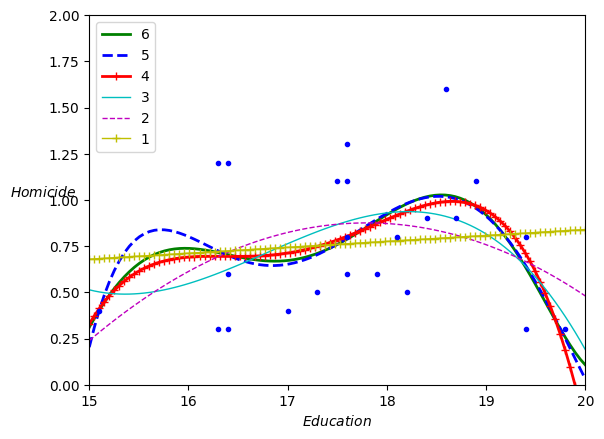

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
Ox = np.linspace(15, 20, 100).reshape(100, 1)
for style, width, degree in (("g-", 2, 6), ("b--", 2, 5), ("r-+", 2, 4), ("c-", 1, 3), ("m--", 1, 2), ("y-+", 1, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=True)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(Ox)
    plt.plot(Ox, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$Education$", fontsize=10)
plt.ylabel("$Homicide$", rotation=0, fontsize=10)
plt.axis([15, 20, 0, 2])
plt.show()

We'll go further using the 3rd degree polynom as it somehow fits the trend of the data, and is the only polynom where the lower the x-axis goes the higher the y values goes, and the higher the values in the x-axis the lower the values in the y-axis

In [75]:
polybig_features = PolynomialFeatures(degree=3, include_bias=True)
std_scaler = StandardScaler()
lin_reg = sklearn.linear_model.LinearRegression()
polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
polynomial_regression.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

Let's evaluate it using the Root Mean Square Error

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
poly_predict = polynomial_regression.predict(X)
poly_rmse = np.sqrt(mean_squared_error(y, poly_predict))
print(poly_rmse)


0.32949245297974006


Perform evaluation via cross validation

In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(polynomial_regression, X, y,
                         scoring="neg_mean_squared_error", cv=10)
poly_rmse_scores = np.sqrt(-scores)
print(poly_rmse_scores)
print("Mean: ", poly_rmse_scores.mean())
print("Std deviation: ", poly_rmse_scores.std())

[0.21318777 0.78827138 0.27752677 0.0691421  0.52541782 0.57101816
 0.37795759 0.25831442 0.36885895 0.29300421]
Mean:  0.37426991812586546
Std deviation:  0.19530875972521894


Test the model on the training set

In [78]:
print(poly_predict)
print(y)

[[0.36750578]
 [0.88385561]
 [0.93486315]
 [0.89333285]
 [0.90996534]
 [0.5021663 ]
 [0.62475455]
 [0.6400807 ]
 [0.86708974]
 [0.62475455]
 [0.88385561]
 [0.60347323]
 [0.76315993]
 [0.6400807 ]
 [0.62475455]
 [0.82884401]
 [0.88385561]
 [0.93088349]
 [0.92194969]
 [0.93688121]
 [0.84656457]
 [0.88385561]
 [0.60347323]]
[[0.3]
 [0.6]
 [0.8]
 [0.9]
 [1.6]
 [0.4]
 [0.3]
 [0.8]
 [1.1]
 [0.6]
 [0.8]
 [1.2]
 [0.4]
 [0.3]
 [1.2]
 [0.5]
 [1.3]
 [0.9]
 [0.6]
 [0.5]
 [1.1]
 [1.1]
 [0.3]]


Test the model on the test set

In [79]:
test_poly_predict = polynomial_regression.predict(X_test)
print(X_test)
print(test_poly_predict)
print(y_test)

[[16.8]
 [17.2]
 [18.4]
 [19.7]
 [18.1]
 [19.3]]
[[0.71652537]
 [0.80782675]
 [0.93088349]
 [0.44552369]
 [0.93486315]
 [0.69253846]]
[[0.7]
 [1.5]
 [0.4]
 [1.4]
 [1.2]
 [0.7]]


Now we're going to try to train a Decision tree regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor
dt_regression = DecisionTreeRegressor()
dt_regression.fit(X, y)


DecisionTreeRegressor()

Let's evaluate this new model using the root mean squared error

In [81]:
dt_predict = dt_regression.predict(X)
dt_rmse = np.sqrt(mean_squared_error(y, dt_predict))
print(dt_rmse)

0.23219182474467284


Now evaluate it using cross-validation

In [82]:
dt_scores = cross_val_score(dt_regression, X, y,
                         scoring="neg_mean_squared_error", cv=10)
dt_rmse_scores = np.sqrt(-scores)
print(dt_rmse_scores)
print("Mean: ", dt_rmse_scores.mean())
print("Std deviation: ", dt_rmse_scores.std())

[0.21318777 0.78827138 0.27752677 0.0691421  0.52541782 0.57101816
 0.37795759 0.25831442 0.36885895 0.29300421]
Mean:  0.37426991812586546
Std deviation:  0.19530875972521894


Let's test it on the training set

In [83]:
print(dt_predict)
print(y)

[0.3  0.95 0.8  0.9  1.6  0.4  0.7  0.55 1.1  0.7  0.95 0.75 0.4  0.55
 0.7  0.5  0.95 0.9  0.6  0.5  1.1  0.95 0.75]
[[0.3]
 [0.6]
 [0.8]
 [0.9]
 [1.6]
 [0.4]
 [0.3]
 [0.8]
 [1.1]
 [0.6]
 [0.8]
 [1.2]
 [0.4]
 [0.3]
 [1.2]
 [0.5]
 [1.3]
 [0.9]
 [0.6]
 [0.5]
 [1.1]
 [1.1]
 [0.3]]


Now let's test it on the test set

In [84]:
test_dt_predict = dt_regression.predict(X_test)
print(X_test)
print(test_dt_predict)
print(y_test)

[[16.8]
 [17.2]
 [18.4]
 [19.7]
 [18.1]
 [19.3]]
[0.4  0.5  0.9  0.3  0.8  0.55]
[[0.7]
 [1.5]
 [0.4]
 [1.4]
 [1.2]
 [0.7]]


Let's see the differences in performance measuring for both models

In [85]:
print ("{:<19} {:<19} {:<19} {:<19}".format('RMSE','Mean','Standard Deviation', 'Model'))
print ("{:<19} {:<19} {:<19} {:<19}".format(poly_rmse, poly_rmse_scores.mean(), poly_rmse_scores.std(), "Polynomial Regression"))
print ("{:<19} {:<19} {:<19} {:<19}".format(dt_rmse, dt_rmse_scores.mean(), dt_rmse_scores.std(), "Decision Tree Regression"))
poly_train_ctr = 0
for i in range(len(poly_predict)):
    if np.abs(poly_predict[i] - y[i]) < 0.1:
        poly_train_ctr += 1
poly_test_ctr = 0
for i in range(len(test_poly_predict)):
    if np.abs(test_poly_predict[i] - y_test[i]) < 0.1:
        poly_test_ctr += 1
dt_train_ctr = 0
for i in range(len(dt_predict)):
    if np.abs(dt_predict[i] - y[i]) < 0.1:
        dt_train_ctr += 1
dt_test_ctr = 0
for i in range(len(test_dt_predict)):
    if np.abs(test_dt_predict[i] - y_test[i]) < 0.1:
        dt_test_ctr += 1
print()
print ("{:<19} {:<19} {:<19}".format('Training set','Test set', 'Model'))
print ("{:<19} {:<19} {:<19}".format(str(poly_train_ctr) + "/23", str(poly_test_ctr) + "/6", "Polynomial Regression"))
print ("{:<19} {:<19} {:<19}".format(str(dt_train_ctr) + "/23", str(dt_test_ctr) + "/6", "Decision Tree Regression"))

RMSE                Mean                Standard Deviation  Model              
0.32949245297974006 0.37426991812586546 0.19530875972521894 Polynomial Regression
0.23219182474467284 0.37426991812586546 0.19530875972521894 Decision Tree Regression

Training set        Test set            Model              
5/23                2/6                 Polynomial Regression
12/23               0/6                 Decision Tree Regression


By performance and results on the training set, the decision tree regressor seems better, but by the results on the testing data, the polynomial regression is better, so we'll choose the decision tree regressor. Let's test it with newer data from https://stats.oecd.org/index.aspx?DataSetCode=BLI

In [86]:
print(dt_regression.predict([[18]])) # Korea, 0.8
print(dt_regression.predict([[17]])) # Portugal, 0.7

[0.6]
[0.4]


Neither model seems to make any good predictions, the polynomial regression was close in 2/6 test cases, whereas the decision tree regression failed to even be close enough (<0.1) to any of the actual labels.

This is because of the very small dataset (36 countries, where 7 were eliminated as they were clear outliers, resulting in only 29 countries) and the very complex nature of the dataset (countries with similar years in education value can have very different homicide rates). Another issue is that we only have a single feature to base the algorithm on, whereas the predicted indicator's complexity cannot be reaally represented by this single feature (as explained, countries with similar years in education value can have very different homicide rates, with no apparent connection between them expressed by the years in education feature). For better results, one would increase the dataset, taking into account a lot more statistics offered by OECD, for more years, and also one would include multiple features, such as employment rate, personal earnings, quality of support network, life satisfaction and others.

As an exercise, let's try and include more features see how both models behave

In [87]:
country_stats = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
country_stats = country_stats[country_stats["INEQUALITY"]=="TOT"]
country_stats = country_stats.pivot(index="Country", columns="Indicator", values="Value")
print(country_stats[["Years in education", "Employment rate", "Quality of support network", "Life satisfaction", "Homicide rate"]])
X = np.c_[country_stats[["Years in education", "Employment rate", "Quality of support network", "Life satisfaction"]]]
y = np.c_[country_stats["Homicide rate"]]

Indicator        Years in education  Employment rate  \
Country                                                
Australia                      19.4             72.0   
Austria                        17.0             72.0   
Belgium                        18.9             62.0   
Brazil                         16.3             67.0   
Canada                         17.2             72.0   
Chile                          16.5             62.0   
Czech Republic                 18.1             68.0   
Denmark                        19.4             73.0   
Estonia                        17.5             68.0   
Finland                        19.7             69.0   
France                         16.4             64.0   
Germany                        18.2             73.0   
Greece                         18.6             49.0   
Hungary                        17.6             58.0   
Iceland                        19.8             82.0   
Ireland                        17.6             

Let's again remove the outliers in the predicted indicator's column, removing the same countries.

In [88]:
remove_indices = [3, 5, 8, 16, 21, 25, 28]
keep_indices = list(set(range(36)) - set(remove_indices))
country_stats = country_stats[["Years in education", "Employment rate", "Quality of support network", "Life satisfaction", "Homicide rate"]].iloc[keep_indices]
print(country_stats[["Years in education", "Employment rate", "Quality of support network", "Life satisfaction", "Homicide rate"]])
X = np.c_[country_stats[["Years in education", "Employment rate", "Quality of support network", "Life satisfaction"]]]
y = np.c_[country_stats["Homicide rate"]]

Indicator        Years in education  Employment rate  \
Country                                                
Australia                      19.4             72.0   
Austria                        17.0             72.0   
Belgium                        18.9             62.0   
Canada                         17.2             72.0   
Czech Republic                 18.1             68.0   
Denmark                        19.4             73.0   
Finland                        19.7             69.0   
France                         16.4             64.0   
Germany                        18.2             73.0   
Greece                         18.6             49.0   
Hungary                        17.6             58.0   
Iceland                        19.8             82.0   
Ireland                        17.6             60.0   
Italy                          16.8             56.0   
Japan                          16.3             72.0   
Korea                          17.5             

Let's again randomly split the data into training and test sets.

In [89]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=19)
X_test, y_test = None, None
for train_idx, test_idx in split.split(country_stats, country_stats["Homicide rate"]):
    print(country_stats.iloc[train_idx])
    X = np.c_[country_stats.iloc[train_idx][["Years in education", "Employment rate", "Quality of support network", "Life satisfaction"]]]
    y = np.c_[country_stats.iloc[train_idx]["Homicide rate"]]
    X_test = np.c_[country_stats.iloc[test_idx][["Years in education", "Employment rate", "Quality of support network", "Life satisfaction"]]]
    y_test = np.c_[country_stats.iloc[test_idx]["Homicide rate"]]

Indicator        Years in education  Employment rate  \
Country                                                
Iceland                        19.8             82.0   
Spain                          17.6             56.0   
Czech Republic                 18.1             68.0   
Netherlands                    18.7             74.0   
Greece                         18.6             49.0   
Luxembourg                     15.1             66.0   
United Kingdom                 16.4             71.0   
Australia                      19.4             72.0   
Korea                          17.5             64.0   
France                         16.4             64.0   
Ireland                        17.6             60.0   
Slovak Republic                16.3             60.0   
Austria                        17.0             72.0   
Denmark                        19.4             73.0   
Turkey                         16.4             50.0   
Switzerland                    17.3             

Let's now use grid search to get the best curve for the polynomial regressor

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': list(range(2, 15, 1))}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')
poly_grid.fit(X, y)
print(poly_grid.best_params_)

{'polynomialfeatures__degree': 3}


Let's now do all the metrics on the new polynom

In [91]:
polynomial_regression = poly_grid.best_estimator_
poly_predict = polynomial_regression.predict(X)
poly_rmse = np.sqrt(mean_squared_error(y, poly_predict))
print("RMSE: " + str(poly_rmse))
scores = cross_val_score(polynomial_regression, X, y,
                         scoring="neg_mean_squared_error", cv=10)
poly_rmse_scores = np.sqrt(-scores)
print("Cross validation: " + str(poly_rmse_scores))
print("Mean: ", poly_rmse_scores.mean())
print("Std deviation: ", poly_rmse_scores.std())

RMSE: 2.391858196344189e-13
Cross validation: [1.25579623 1.35438401 1.08937044 0.71785219 1.00670778 0.58999086
 0.68073275 0.41912381 0.44845366 0.84909794]
Mean:  0.8411509689085049
Std deviation:  0.3099612975273186


Let's see how it does on the training and test data

In [92]:
print("TRAINING DATA")
print(poly_predict)
print(y)
print("TEST DATA")
test_poly_predict = polynomial_regression.predict(X_test)
print(test_poly_predict)
print(y_test)

TRAINING DATA
[[0.3]
 [0.6]
 [0.8]
 [0.9]
 [1.6]
 [0.4]
 [0.3]
 [0.8]
 [1.1]
 [0.6]
 [0.8]
 [1.2]
 [0.4]
 [0.3]
 [1.2]
 [0.5]
 [1.3]
 [0.9]
 [0.6]
 [0.5]
 [1.1]
 [1.1]
 [0.3]]
[[0.3]
 [0.6]
 [0.8]
 [0.9]
 [1.6]
 [0.4]
 [0.3]
 [0.8]
 [1.1]
 [0.6]
 [0.8]
 [1.2]
 [0.4]
 [0.3]
 [1.2]
 [0.5]
 [1.3]
 [0.9]
 [0.6]
 [0.5]
 [1.1]
 [1.1]
 [0.3]]
TEST DATA
[[1.18616272]
 [0.81500803]
 [1.10596141]
 [0.695556  ]
 [0.54997742]
 [0.5258404 ]]
[[0.7]
 [1.5]
 [0.4]
 [1.4]
 [1.2]
 [0.7]]


We can see very good results in the training data, however the algorithm still fails to generalize well. Let's see how the decision tree regressor does.

We'll use again GridSearch to get the best hyperparameters for it.

In [65]:
params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"], "min_samples_split": list(range(1, 10, 1)),
          "min_samples_leaf": list(range(1, 10, 1))}
dt_grid = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring="neg_mean_squared_error")
dt_grid.fit(X, y)
print(dt_grid.best_params_)

{'criterion': 'squared_error', 'min_samples_leaf': 9, 'min_samples_split': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

Let's redo the metrics for the decision tree regressor.

In [93]:
dt_regression = dt_grid.best_estimator_
dt_predict = dt_regression.predict(X)
dt_rmse = np.sqrt(mean_squared_error(y, dt_predict))
print("RMSE: " + str(dt_rmse))
dt_scores = cross_val_score(dt_regression, X, y,
                         scoring="neg_mean_squared_error", cv=10)
dt_rmse_scores = np.sqrt(-scores)
print("Cross validation: " + str(dt_rmse_scores))
print("Mean: ", dt_rmse_scores.mean())
print("Std deviation: ", dt_rmse_scores.std())

RMSE: 0.24990775636825904
Cross validation: [1.25579623 1.35438401 1.08937044 0.71785219 1.00670778 0.58999086
 0.68073275 0.41912381 0.44845366 0.84909794]
Mean:  0.8411509689085049
Std deviation:  0.3099612975273186


Let's now see what it gives for the training and test data

In [94]:
print("TRAINING DATA")
print(dt_predict)
print(y)
print("TEST DATA")
test_dt_predict = dt_regression.predict(X_test)
print(test_dt_predict)
print(y_test)

TRAINING DATA
[0.50833333 1.04545455 0.50833333 0.50833333 1.04545455 0.50833333
 0.50833333 0.50833333 1.04545455 1.04545455 1.04545455 1.04545455
 0.50833333 0.50833333 1.04545455 0.50833333 1.04545455 1.04545455
 0.50833333 0.50833333 1.04545455 1.04545455 0.50833333]
[[0.3]
 [0.6]
 [0.8]
 [0.9]
 [1.6]
 [0.4]
 [0.3]
 [0.8]
 [1.1]
 [0.6]
 [0.8]
 [1.2]
 [0.4]
 [0.3]
 [1.2]
 [0.5]
 [1.3]
 [0.9]
 [0.6]
 [0.5]
 [1.1]
 [1.1]
 [0.3]]
TEST DATA
[1.04545455 0.50833333 1.04545455 0.50833333 0.50833333 0.50833333]
[[0.7]
 [1.5]
 [0.4]
 [1.4]
 [1.2]
 [0.7]]


We can see a total failure of the decision tree regressor, on both datasets. It is probably due to the small quantity of data, not enough for it to fully generalize and observe the complex patterns. Let's do a final side-by-side comparison between those 2 models.

In [95]:
print ("{:<19} {:<19} {:<19} {:<19}".format('RMSE','Mean','Standard Deviation', 'Model'))
print ("{:<19} {:<19} {:<19} {:<19}".format(poly_rmse, poly_rmse_scores.mean(), poly_rmse_scores.std(), "Polynomial Regression"))
print ("{:<19} {:<19} {:<19} {:<19}".format(dt_rmse, dt_rmse_scores.mean(), dt_rmse_scores.std(), "Decision Tree Regression"))
poly_train_ctr = 0
for i in range(len(poly_predict)):
    if np.abs(poly_predict[i] - y[i]) < 0.1:
        poly_train_ctr += 1
poly_test_ctr = 0
for i in range(len(test_poly_predict)):
    if np.abs(test_poly_predict[i] - y_test[i]) < 0.1:
        poly_test_ctr += 1
dt_train_ctr = 0
for i in range(len(dt_predict)):
    if np.abs(dt_predict[i] - y[i]) < 0.1:
        dt_train_ctr += 1
dt_test_ctr = 0
for i in range(len(test_dt_predict)):
    if np.abs(test_dt_predict[i] - y_test[i]) < 0.1:
        dt_test_ctr += 1
print()
print ("{:<19} {:<19} {:<19}".format('Training set','Test set', 'Model'))
print ("{:<19} {:<19} {:<19}".format(str(poly_train_ctr) + "/23", str(poly_test_ctr) + "/6", "Polynomial Regression"))
print ("{:<19} {:<19} {:<19}".format(str(dt_train_ctr) + "/23", str(dt_test_ctr) + "/6", "Decision Tree Regression"))

RMSE                Mean                Standard Deviation  Model              
2.391858196344189e-13 0.8411509689085049  0.3099612975273186  Polynomial Regression
0.24990775636825904 0.8411509689085049  0.3099612975273186  Decision Tree Regression

Training set        Test set            Model              
23/23               0/6                 Polynomial Regression
6/23                0/6                 Decision Tree Regression


**Conclusion:**
With more features, the polynomial regression model predicted the training set perfectly, however, it failed to generalize, due to the lack of data. On the other hand, the decision tree regression model got lost in the complexity of the data and it's lack of quantity, and failed to predict anything correctly. More data is required for these models to achieve better predictions.